In [1]:
import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon
import pickle

import utils

# Camera calibration

## Creating array of points

In [2]:
# Object points
nx = 9 # The number of inside corners in x
ny = 6 # The number of inside corners in y

filenames = glob.glob("camera_cal/calibration*.jpg")
filenames.sort()

objpoints = [] # 3D points in real world space (XYZ coordinates ideal values)
imgpoints = [] # 2D points in image plane (XY coordinates of the detected points in the image file)

temp = np.zeros((9*6, 3), np.float32)
# (0,0,0), (1,0,0), (2,0,0)...(0,1,0), (1,1,0), (2,1,0)...(8,5,0)
temp[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

for filename in filenames:
    img = cv2.imread(filename)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(temp)

print("{0} out of {1} images can be used for calibration".format(len(imgpoints), len(filenames)))

17 out of 20 images can be used for calibration


### Getting data needed to calibrate camera

In [3]:
# dist = distortion coefficients
# mtx = camera matrix to transform 3D image points to 2D image points
# rvecs = Rotation vectors (To get position of the camera in the world)
# tvecs = Translation vectors (To get position of the camera in the world)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

### Showing distorted and undistorted images

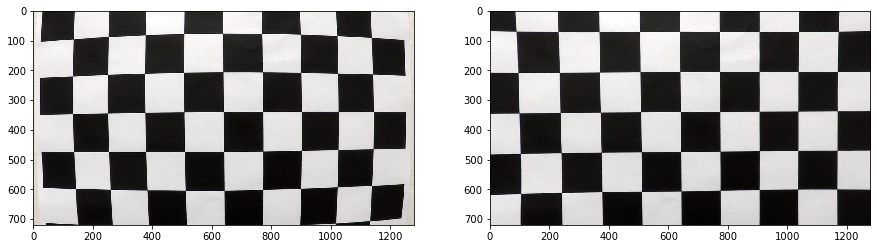

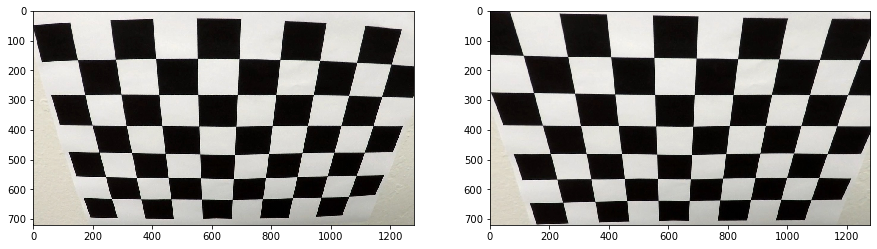

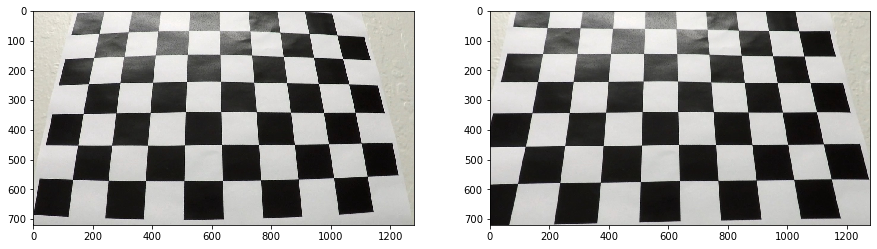

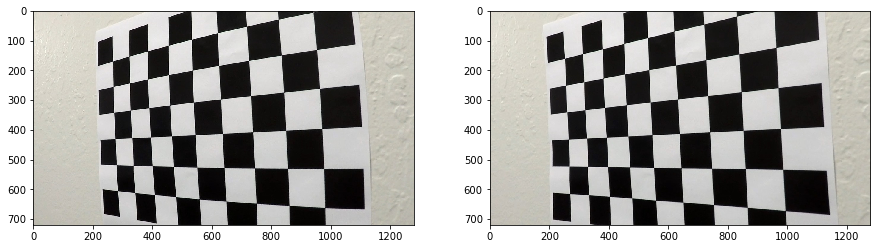

In [4]:
for idx in range(1, 5):
    img = cv2.imread("camera_cal/calibration" + str(idx) + ".jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undistortImg = cv2.undistort(img, mtx, dist, None, mtx)
    
    fig, ax = plt.subplots(1, 2, figsize=(15,15))
    ax[0].imshow(img)
    ax[1].imshow(undistortImg)
    plt.show()

### Saving calibrateCamera output

In [5]:
cameraData = {'mtx': mtx,
             'dist': dist,
             'rvecs': rvecs,
             'tvecs': tvecs}

utils.saveCameraData(cameraData)